# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Exploring the problem:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan?

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives...


## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.tail(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [5]:
df.shape[0]

614

In [6]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Look at some basic statistics for numerical variables.

In [7]:
df.describe(include=[np.number])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



* Most of the applicants have `Credit_History` (about ~2/3), probabely a positive feature for loan approval
* The `ApplicantIncome` and seems skewed and conterary to my impression, `CoapplicantIncome` is generally less than `ApplicantIncome`.

Definition: A co-applicant is an additional person considered in the underwriting and approval of a loan or other type of application.
            Applying for a loan with a co-applicant can help to improve the chances of loan approval and also provide for more favorable
            loan terms.


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [8]:
df.drop(columns=['Loan_ID']).describe(exclude=[np.number])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Let's explore further using the frequency of different categories in each nominal variable. We exclude the ID obvious reasons.

* From the demography point of view, the data is skewed toward `Male`, `Married`, `No-Child` and `Employed`
* The target is biased toward Approved `Loan_Status` = `Y` (about ~2/3)

### Distribution analysis

Let's study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



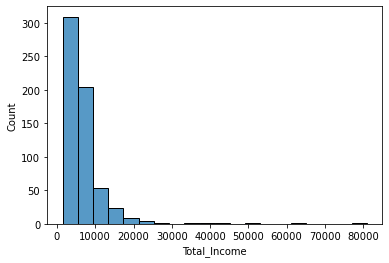

In [32]:
import seaborn as sns
histplot = sns.histplot(x=total_transform(df[['ApplicantIncome', 'CoapplicantIncome']]),  bins=20)
histplot.set_xlabel('Total_Income')
plt.show()


Box plots to understand the distributions. 

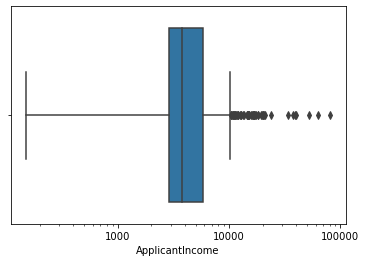

In [10]:
boxplot = sns.boxplot(x='ApplicantIncome',data=df)
boxplot.set(xscale='log')
boxplot.set_xticks([1000,10000,100000])
boxplot.set_xticklabels([1000,10000,100000])
plt.show()

Look at the distribution of income segregated  by `Education`

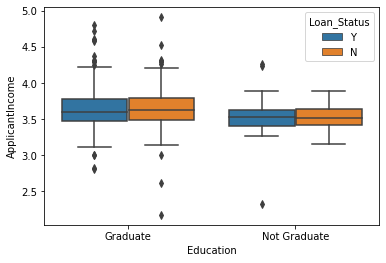

In [33]:
boxplot = sns.boxplot(y=log_transform(df.ApplicantIncome), x=df.Education, hue=df.Loan_Status)
#boxplot.set(yscale='log')
#boxplot.set_yticks([1000,10000,100000])
#boxplot.set_yticklabels([1000,10000,100000])
plt.show()

Look at the histogram and boxplot of LoanAmount

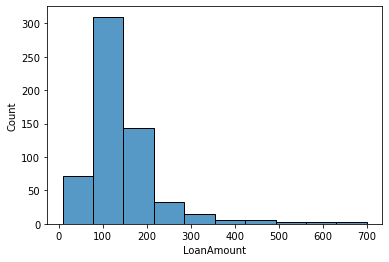

In [12]:
histplot = sns.histplot(x='LoanAmount', data=df, bins=10)
plt.show()

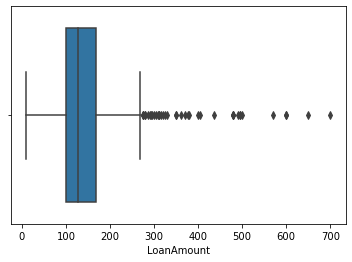

In [13]:
boxplot = sns.boxplot(x='LoanAmount', data=df)
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Let's try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [14]:
pivot_data = pd.pivot_table(df,index=['Married'], columns=['Gender'],values=['ApplicantIncome'], aggfunc=np.mean)

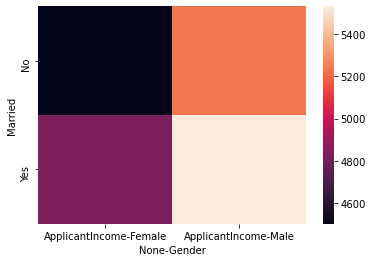

In [15]:
heatmap = sns.heatmap(pivot_data)
plt.show()

In [16]:
pivot_data = pd.pivot_table(df,index=['Dependents'], columns=['Married'],values=['ApplicantIncome'], aggfunc=np.mean)

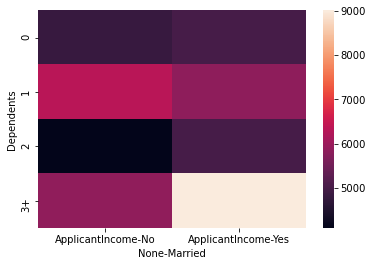

In [17]:
heatmap = sns.heatmap(pivot_data)
plt.show()

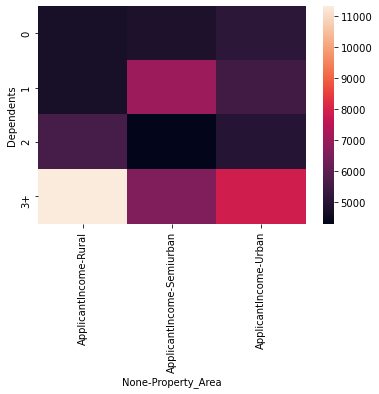

In [18]:
pivot_data = pd.pivot_table(df,index=['Dependents'], columns=['Property_Area'],values=['ApplicantIncome'], aggfunc=np.mean)
heatmap = sns.heatmap(pivot_data)
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Let's impute missing values for all columns and use the values which we find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [19]:
# number of rows with missing values
sum([True for idx,row in df.iterrows() if any(row.isnull())])

134

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [21]:
numeric_standardization = Pipeline([('impute_mean', SimpleImputer(strategy='mean')),
                              ('scaling', StandardScaler)])
categorical_standardization = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')),
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

### Extreme values
Let's try a log transformation to get rid of the extreme values in `LoanAmount` and re-plot the histogram before and after the transformation

In [22]:
from sklearn.preprocessing import FunctionTransformer

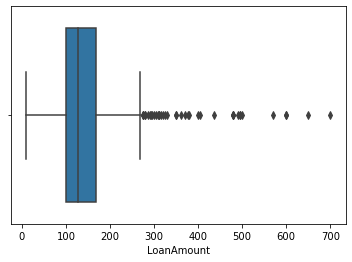

In [23]:
def log_transform(X):
    X_log = np.log10(X)
    return X_log

log_transform_object = FunctionTransformer(log_transform)

boxplot = sns.boxplot(x=df.LoanAmount)
plt.show()

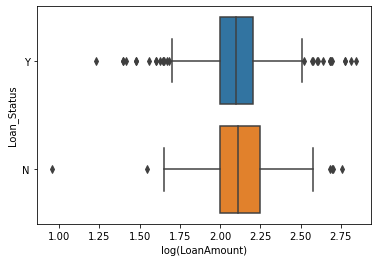

In [35]:
boxplot = sns.boxplot(x=log_transform(df.LoanAmount), y=df.Loan_Status)
boxplot.set_xlabel('log(LoanAmount)')
plt.show()

Also, let's combine both incomes as total income and take a log transformation of the same.

In [27]:
def total_transform(X):
    X_total = X.sum(axis=1)
    return X_total

total_transform_object = FunctionTransformer(total_transform)

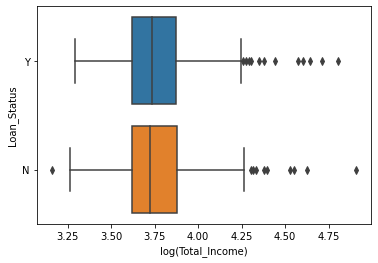

In [36]:
boxplot = sns.boxplot(x=log_transform(total_transform(df[['ApplicantIncome', 'CoapplicantIncome']])), y=df.Loan_Status)
boxplot.set_xlabel('log(Total_Income)')
plt.show()